In [1]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('./data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
# Any results you write to the current directory are saved as output.

./data/titanic.csv
./data/basePqs.csv
./data/gapMiner.csv


In [2]:
data = pd.read_csv('./data/basePqs.csv')

data.head(5)


,id_cobis,fecha_desde,saldoPromedio,transIn,transout,transInDolar,transoutDolar,transInPesosMonto,transAutPesosMonto,transInDolarMonto,...,sdoProm3mesesDecile,ratioConsumos1p6meses,ratioConsumosCuotas6meses,ratioConsumos6Meses,ratioSaldoProm6meses,ratioConsumos1p3meses,ratioConsumosCuotas3meses,ratioConsumos3Meses,ratioSaldoProm3meses,target
0,2960236,2019-02-01,8250.03,0,0,0,0,0.0,0.0,0.00,...,0,0.999175,1.244829,1.030243,2.000002,0.660418,0.991899,0.776025,1.000000,0
1,2960262,2019-02-01,57.99,0,0,0,0,0.0,0.0,0.00,...,0,0.000000,0.978238,0.842485,1.919880,0.000000,1.000000,0.768841,0.991451,0
2,2960521,2019-02-01,846.88,0,0,0,0,0.0,0.0,0.00,...,0,0.000000,1.470489,1.433885,0.171539,0.000000,1.000000,0.986215,0.167531,0
3,2960569,2019-02-01,0.00,0,0,0,0,0.0,0.0,0.00,...,0,1.238653,0.799299,0.995512,0.000000,0.841210,0.948216,0.873473,0.000000,0
4,2960645,2019-02-01,38126.42,2,1,1,0,13034.0,15000.0,374.06,...,0,0.000000,2.459308,1.394782,1.385706,0.000000,1.975882,1.034761,0.935070,0


In [3]:
data2 = pd.read_csv('./data/basePqs.csv', index_col = "id_cobis")
data2.head(5)

,fecha_desde,saldoPromedio,transIn,transout,transInDolar,transoutDolar,transInPesosMonto,transAutPesosMonto,transInDolarMonto,transAutDolarMonto,...,sdoProm3mesesDecile,ratioConsumos1p6meses,ratioConsumosCuotas6meses,ratioConsumos6Meses,ratioSaldoProm6meses,ratioConsumos1p3meses,ratioConsumosCuotas3meses,ratioConsumos3Meses,ratioSaldoProm3meses,target
id_cobis,,,,,,,,,,,,,,,,,,,,,
2960236,2019-02-01,8250.03,0,0,0,0,0.0,0.0,0.00,0.0,...,0,0.999175,1.244829,1.030243,2.000002,0.660418,0.991899,0.776025,1.000000,0
2960262,2019-02-01,57.99,0,0,0,0,0.0,0.0,0.00,0.0,...,0,0.000000,0.978238,0.842485,1.919880,0.000000,1.000000,0.768841,0.991451,0
2960521,2019-02-01,846.88,0,0,0,0,0.0,0.0,0.00,0.0,...,0,0.000000,1.470489,1.433885,0.171539,0.000000,1.000000,0.986215,0.167531,0
2960569,2019-02-01,0.00,0,0,0,0,0.0,0.0,0.00,0.0,...,0,1.238653,0.799299,0.995512,0.000000,0.841210,0.948216,0.873473,0.000000,0
2960645,2019-02-01,38126.42,2,1,1,0,13034.0,15000.0,374.06,0.0,...,0,0.000000,2.459308,1.394782,1.385706,0.000000,1.975882,1.034761,0.935070,0


In [4]:
data.loc[0]

id_cobis                        2960236
fecha_desde                  2019-02-01
saldoPromedio                   8250.03
transIn                               0
transout                              0
                                ...    
ratioConsumos1p3meses          0.660418
ratioConsumosCuotas3meses      0.991899
ratioConsumos3Meses            0.776025
ratioSaldoProm3meses                  1
target                                0
Name: 0, Length: 84, dtype: object

In [5]:
data2.loc[2960236]

fecha_desde                  2019-02-01
saldoPromedio                   8250.03
transIn                               0
transout                              0
transInDolar                          0
                                ...    
ratioConsumos1p3meses          0.660418
ratioConsumosCuotas3meses      0.991899
ratioConsumos3Meses            0.776025
ratioSaldoProm3meses                  1
target                                0
Name: 2960236, Length: 83, dtype: object

In [6]:
dataIteraciones = data.head(5)
saldoTotal = 0
for index, row in dataIteraciones.iterrows():
    print("index: ", index)
    print(row)
    saldoTotal += row["saldoPromedio"]

print ("-----------------")    
print ("-----------------")    
print("saldo Ultimo Registro: ",row["saldoPromedio"])
print("suma de Saldos: ", saldoTotal)

index:  0
id_cobis                        2960236
fecha_desde                  2019-02-01
saldoPromedio                   8250.03
transIn                               0
transout                              0
                                ...    
ratioConsumos1p3meses          0.660418
ratioConsumosCuotas3meses      0.991899
ratioConsumos3Meses            0.776025
ratioSaldoProm3meses                  1
target                                0
Name: 0, Length: 84, dtype: object
index:  1
id_cobis                        2960262
fecha_desde                  2019-02-01
saldoPromedio                     57.99
transIn                               0
transout                              0
                                ...    
ratioConsumos1p3meses                 0
ratioConsumosCuotas3meses             1
ratioConsumos3Meses            0.768841
ratioSaldoProm3meses           0.991451
target                                0
Name: 1, Length: 84, dtype: object
index:  2
id_cobis            

In [7]:
dataGrouped = data.groupby("target")

In [8]:
dataGrouped.saldoPromedio.sum()

target
0    4.257309e+08
1    2.393852e+06
Name: saldoPromedio, dtype: float64

In [9]:
dataGrouped.saldoPromedio.describe()

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,35859.0,11872.359713,40250.923395,-0.02,2.605,1728.96,8556.675,2325806.26
1,806.0,2970.039566,16249.880679,-0.01,0.000,0.00,452.220,295669.09


In [10]:
columns = data.columns
for column in columns:
    print(column, data[column].dtype)
columns = list(columns)

id_cobis int64
fecha_desde object
saldoPromedio float64
transIn int64
transout int64
transInDolar int64
transoutDolar int64
transInPesosMonto float64
transAutPesosMonto float64
transInDolarMonto float64
transAutDolarMonto float64
totTxPromosTD int64
totConsumoPromosTD float64
usoCaja int64
usoTas int64
usoHb int64
usoMb int64
usoIvr int64
usoTel int64
usoAtm int64
consumoTc1Cuota float64
consumoTcCuotas float64
adelantoTc1Cuota float64
adelantoTcCuotas float64
adelantoExterior float64
promosTcTransacciones int64
promosTcMonto float64
certificadosPesosPf int64
certificadosDolarPf int64
certificadosUvaPf int64
flagTc int64
flagTcHml int64
flagGasCorralon int64
flagPP int64
flagPH int64
flagPhProcrear int64
flagPPProcrear int64
flagCaPS int64
flagCaPesos int64
flagCaDolar int64
flagCc int64
flagPFI int64
flagSegVd int64
flagSegHg int64
flagSegAp int64
flagSegBm int64
flagSegAtm int64
flagSegSd int64
flagSegDesem int64
flagSegCp int64
plazoRestantePrestamo float64
cons3mesesDecile int64
co

In [11]:
for column in columns:
    print("--------------")
    print(column)
    print(dataGrouped[column].describe())
    


--------------
id_cobis
          count          mean           std     min         25%        50%  \
target                                                                       
0       35859.0  4.342585e+06  2.296230e+06   725.0  2200496.50  4958455.0   
1         806.0  4.651032e+06  2.308635e+06  4907.0  2579966.25  5256979.0   

               75%        max  
target                         
0       6331506.50  7537398.0  
1       6666106.25  7537323.0  
--------------
fecha_desde
        count unique         top   freq
target                                 
0       35859      1  2019-02-01  35859
1         806      1  2019-02-01    806
--------------
saldoPromedio
          count          mean           std   min    25%      50%       75%  \
target                                                                        
0       35859.0  11872.359713  40250.923395 -0.02  2.605  1728.96  8556.675   
1         806.0   2970.039566  16249.880679 -0.01  0.000     0.00   452.220   

  

          count      mean       std  min  25%  50%  75%  max
target                                                      
0       35859.0  0.216236  0.411683  0.0  0.0  0.0  0.0  1.0
1         806.0  0.177419  0.382260  0.0  0.0  0.0  0.0  1.0
--------------
flagPH
          count      mean       std  min  25%  50%  75%  max
target                                                      
0       35859.0  0.018963  0.136397  0.0  0.0  0.0  0.0  1.0
1         806.0  0.006203  0.078566  0.0  0.0  0.0  0.0  1.0
--------------
flagPhProcrear
          count      mean       std  min  25%  50%  75%  max
target                                                      
0       35859.0  0.071753  0.258083  0.0  0.0  0.0  0.0  1.0
1         806.0  0.033499  0.180047  0.0  0.0  0.0  0.0  1.0
--------------
flagPPProcrear
          count      mean       std  min  25%  50%  75%  max
target                                                      
0       35859.0  0.033018  0.178687  0.0  0.0  0.0  0.0  1.0
1  

          count  mean  std  min  25%  50%  75%  max
target                                             
0       35859.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
1         806.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
--------------
acreditaciones3mesesQuartile
          count      mean       std  min  25%  50%  75%  max
target                                                      
0       35859.0  0.790541  1.319607  0.0  0.0  0.0  1.0  4.0
1         806.0  0.160050  0.719173  0.0  0.0  0.0  0.0  4.0
--------------
acreditaciones3mesesDecile
          count      mean       std  min  25%  50%  75%   max
target                                                       
0       35859.0  1.738030  3.018918  0.0  0.0  0.0  3.0  10.0
1         806.0  0.366005  1.688481  0.0  0.0  0.0  0.0  10.0
--------------
acreditaciones6mesesQuartile
          count      mean       std  min  25%  50%  75%  max
target                                                      
0       35859.0  0.804233  1.326141  0.0  0.0  0

In [12]:
data.ratioSaldoProm3meses.hist()

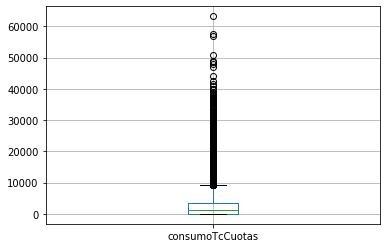

In [13]:
data.boxplot(column = ["consumoTcCuotas"])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0e68c58750>,
      dtype=object)

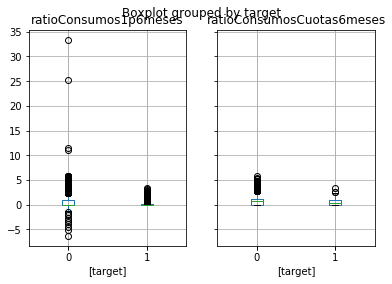

In [14]:
data.boxplot(column = ["ratioConsumos1p6meses", "ratioConsumosCuotas6meses"], by = ["target"])


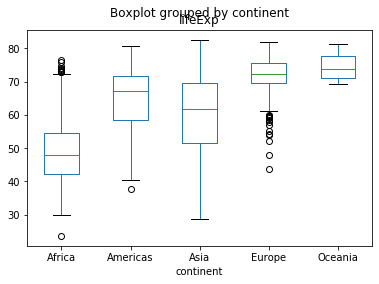

In [15]:
import seaborn as sns
gapMiner = pd.read_csv('./data/gapMiner.csv')

gapMiner.boxplot(by='continent', 
                       column=['lifeExp'], 
                       grid=False)


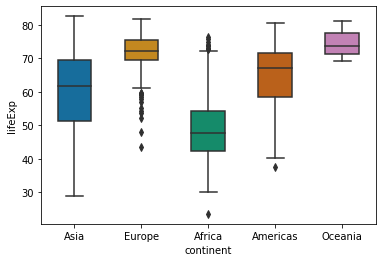

In [16]:
bplot = sns.boxplot(y='lifeExp', x='continent', 
                 data=gapMiner, 
                 width=0.5,
                 palette="colorblind")